<a href="https://colab.research.google.com/github/lexshepelev/practicum_data_example_repo/blob/master/CNR_NeuralNetwork_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, MaxPooling2D

In [ ]:
#!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Предобработанные данные цифр

**Загражаем объекты, пригодные для обучения**

In [ ]:
features_digit_arr = np.load('/content/drive/MyDrive/DataScience/car-number-recognition/code/features_digit_arr.npy')

In [ ]:
target_digit_arr = np.load('/content/drive/MyDrive/DataScience/car-number-recognition/code/target_digit_arr.npy')

In [ ]:
features_digit_arr.shape

(6988, 50, 40)

In [ ]:
target_digit_arr.shape

(6988,)

# Функции

# Модель

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.01)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
features_digit_arr = features_digit_arr.reshape(features_digit_arr.shape[0], 50*40)
features_digit_arr.shape

(6988, 2000)

In [ ]:
features_digit_arr[1]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [ ]:
features_digit_train, features_digit_test, target_digit_train, target_digit_test = \
    train_test_split(features_digit_arr, target_digit_arr, test_size=0.2, stratify=target_digit_arr, random_state=123)

In [ ]:
def create_model():
  model_digit = keras.models.Sequential()

  """ LeNet + Adam (допилить)
  model.add(Conv2D(filters=6, kernel_size=(3, 3), padding='same', activation="ReLU", input_shape=(50, 40, 1)))
  model.add(AvgPool2D(pool_size=(2, 2), strides=None, padding='valid'))
  model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="tanh"))
  model.add(AvgPool2D(pool_size=(2, 2), strides=None, padding='valid'))
  model.add(Flatten())
  model.add(Dense(units=120, activation='tanh'))
  model.add(Dense(units=84, activation='tanh'))
  #model.add(Dense(units=10, activation='softmax'))
  model.add(keras.layers.Dense(units=10, input_dim=features_digit_train.shape[1], 
                              activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
  """
  model_digit.add(keras.layers.Dense(units=10, input_dim=features_digit_train.shape[1], 
                              activation='softmax'))
  model_digit.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

  model_digit.fit(features_digit_train, target_digit_train, epochs=10, verbose=2,
            validation_data=(features_digit_test, target_digit_test))
  return(model_digit)

In [ ]:
model_digit = create_model()

Epoch 1/10
175/175 - 1s - loss: 2501.1865 - acc: 0.9657 - val_loss: 164.6816 - val_acc: 0.9950 - 661ms/epoch - 4ms/step
Epoch 2/10
175/175 - 0s - loss: 14.8595 - acc: 0.9986 - val_loss: 149.3959 - val_acc: 0.9943 - 370ms/epoch - 2ms/step
Epoch 3/10
175/175 - 0s - loss: 11.9921 - acc: 0.9984 - val_loss: 133.0110 - val_acc: 0.9943 - 442ms/epoch - 3ms/step
Epoch 4/10
175/175 - 0s - loss: 3.0308 - acc: 0.9991 - val_loss: 106.1838 - val_acc: 0.9950 - 366ms/epoch - 2ms/step
Epoch 5/10
175/175 - 0s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 106.1838 - val_acc: 0.9950 - 350ms/epoch - 2ms/step
Epoch 6/10
175/175 - 0s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 106.1838 - val_acc: 0.9950 - 441ms/epoch - 3ms/step
Epoch 7/10
175/175 - 0s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 106.1838 - val_acc: 0.9950 - 444ms/epoch - 3ms/step
Epoch 8/10
175/175 - 0s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 106.1838 - val_acc: 0.9950 - 367ms/epoch - 2ms/step
Epoch 9/10
175/175 - 0s - loss: 0.0000e+00 

In [ ]:
model_digit.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20010     
                                                                 
Total params: 20,010
Trainable params: 20,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
digit_arr = np.load('/content/drive/MyDrive/DataScience/car-number-recognition/code/features_digit_arr.npy')

In [ ]:
def predict_from_arr(arr, model):
  arr = arr.reshape(1, 50*40)
  prediction = model_digit.predict(arr)[0]
  #print('[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]')
  #print(prediction)
  result = np.where(prediction == prediction.max())[0][0]
  return result

In [ ]:
predict_from_arr(digit_arr[5000], model_digit)

6

In [ ]:
target_digit_arr[5000]

6

In [ ]:
model_digit.save("model_digit_Neural_LR_v1")

In [ ]:
#from joblib import load
#model_digit = load('model_digit_Neural_LR.sav')

In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/DataScience/car-number-recognition/models/model_digit_Neural_LR_v1")

In [ ]:
#dump(model_digit, '/content/drive/MyDrive/DataScience/car-number-recognition/models/model_digit_Neural_LR.sav')

# Проверка

In [ ]:
import pandas as pd
from PIL import Image, ImageOps, ImageFilter
import matplotlib.pyplot as plt

In [ ]:
def resizeimg(image, width, height):
    """
    Функция изменяет размер изображения
    """
    resized_img = image.resize((width, height), Image.ANTIALIAS)
    array = np.array(resized_img)
    #plt.imshow(array);
    return array

In [ ]:
def longest_segment(array, err=1):
    """
    Функция принимает одномерный массив и погрешность,
    возвращает самую длинную непрерывную последовательность. 
    
    Например, на входе: 0,1,3,4,5,7
    На выходе: 3,4,5.
    """
    segment = []
    longest_segment = []
    n = len(array)
    for i in range(0, n):
        if len(segment) >= len(longest_segment):
            longest_segment = segment
        cur_elem = array[i]
        if i == n-1:
            next_elem = None
        else:
            next_elem = array[i+1]
            distance = abs(next_elem - cur_elem)
        #print('i:', i)
        #print('cur_elem:', cur_elem)
        #print('next_elem:', next_elem)
        #print('distance:', distance)
        segment.append(array[i])
        if distance > err:
            segment=[]

        #print('segment:', segment)
        #print('longest_segment:', longest_segment)
    return np.array(longest_segment)      

In [ ]:
def crop_2d_array(image):
    """
    Функция обрезает изображение до не пустого. Возвращает 2d массив
    """
    image_data_bw = image.min(axis=0)
    non_empty_columns = np.where(image.min(axis=0)<50)[0]
    non_empty_rows = np.where(image.min(axis=1)<50)[0]
    non_empty_columns = longest_segment(non_empty_columns) #Берем самый длинный отрезок без пропусков
    non_empty_rows = longest_segment(non_empty_rows)
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))
    image_data_new = image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1]
    #plt.imshow(image_data_new)
    return image_data_new

In [ ]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

In [ ]:
def myfilter(image, 
             show=False, 
             istrash=False, 
             isarray=False,
             width=12,
             height=18,):
    """
    Принимает 2d массив сырого изображения, возвращает предобработанное изображение
    """
    if istrash == True:
        image = np.delete(image, 0, 0)
        image = np.delete(image, 0, 1)
    if isarray == True:
        img = Image.fromarray(image, 'L')
    elif isarray == False:
        img = image
    img = add_margin(img, 1, 1, 1, 1, 255)
    #img = img.filter(ImageFilter.Kernel((3, 3),
    #        (0, -1, 0,
    #         0, 5, 0,
    #         0, 0, 0), 1, 0))
    #
    #img = img.filter(ImageFilter.Kernel((3, 3),
    #        (0, -1, 0,
    #         -1, 5, -1,
    #         0, -1, 0), 1, 0))
    #
    img = img.filter(ImageFilter.Kernel((3, 3),
            (0, 0, 0,
             0, 1, 0,
             0, 0, 0), 1, 0))
    
    #img = img.filter(ImageFilter.Kernel((3, 3),
    #        (0, 0, 0,
    #         0, 1, 0,
    #         0, 0, 0), 1, 0))
    
    #threshold = 80
    #img = img.point(lambda p: p > threshold and 255)
    img = np.array(img)
    try:
        img= crop_2d_array(img)
    except:
        print('crop_2d_array: 2d массива нет (1я итерация)')
    try:
        img= crop_2d_array(img)
    except:
        print('crop_2d_array: 2d массива нет (2я итерация)')    
    img = Image.fromarray(img, 'L')
    threshold = 65
    img = img.point(lambda p: p > threshold and 255)
    #img = img.filter(ImageFilter.MinFilter(1))
    img = resizeimg(img, width, height)
    
    if show == True:
        plt.imshow(img)
        plt.show()
    return img

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/DataScience/car-number-recognition/symbols/number.pickle', 'rb') as f:
    symbol_list = pickle.load(f)

In [ ]:
symbol_list[0].shape

(120, 75)

In [ ]:
img = Image.fromarray(symbol_list[0], 'L')
resizeimg(img, 40, 50)

array([[  0,   0,   0, ...,   5,   5,   5],
       [  4,   4,   4, ...,   0,   0,   0],
       [  0,   0,   0, ..., 128, 128, 128],
       ...,
       [255, 255, 255, ..., 200, 255, 255],
       [255, 255, 255, ..., 255, 251, 252],
       [255, 255, 255, ..., 252, 255, 255]], dtype=uint8)

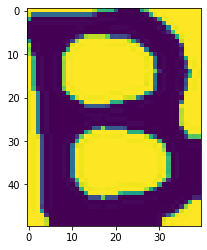

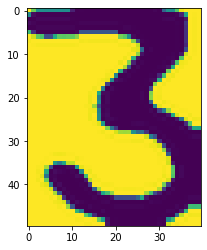

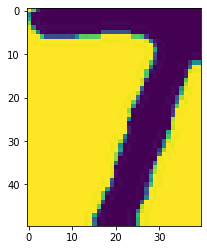

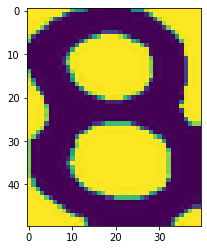

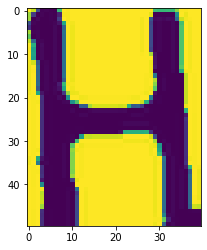

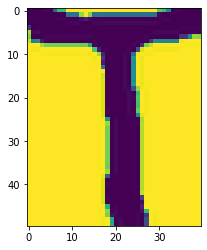

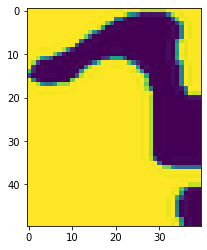

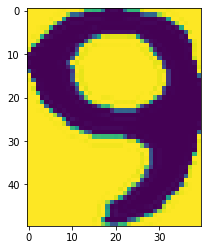

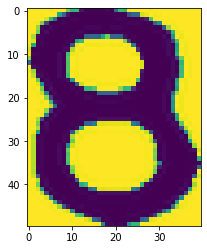

In [ ]:
preprocessed_list = []
for i in range(0, 9):
    preprocessed_list.append(myfilter(symbol_list[i], True, True, True, 40, 50))

In [ ]:
preprocessed_list[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [240,  89,  91, ..., 255, 255, 255],
       [147,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 254, ..., 255, 255, 255],
       [255, 255, 254, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
def predict_carnumb(model_digit, rows_of_pickle: list):
    carnumber = []
    carnumber.append('X')
    carnumber.append(str(predict_from_arr(rows_of_pickle[1], reconstructed_model)))
    carnumber.append(str(predict_from_arr(rows_of_pickle[2], reconstructed_model)))
    carnumber.append(str(predict_from_arr(rows_of_pickle[3], reconstructed_model)))
    carnumber.append('X')
    carnumber.append('X')
    carnumber.append(str(predict_from_arr(rows_of_pickle[6], reconstructed_model)))
    carnumber.append(str(predict_from_arr(rows_of_pickle[7], reconstructed_model)))
    carnumber.append(str(predict_from_arr(rows_of_pickle[8], reconstructed_model)))
    carnumber=''.join(carnumber)
    return carnumber

In [ ]:
%%time
predict_carnumb(model_digit, preprocessed_list)

CPU times: user 233 ms, sys: 3.19 ms, total: 236 ms
Wall time: 248 ms


'X378XX198'

In [ ]:
%%time
predict_carnumb(model_digit, symbol_list)

ValueError: ignored